In [1]:
import torch
from torch import Tensor                  
import torch.nn as nn                     

import matplotlib.pyplot as plt

import numpy as np
import time

torch.set_default_tensor_type(torch.DoubleTensor)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from tqdm import tqdm
print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name()) 

cuda


In [15]:
class CNNR(nn.Module):
    
    def __init__(self,layers):
        super().__init__() 
              
        self.activation = nn.Tanh()
        self.loss_function = nn.MSELoss(reduction ='mean')
        self.linears = nn.ModuleList([nn.Linear(layers[i], layers[i+1]) for i in range(len(layers)-1)]).to(device)
        self.mses = []
        self.results = []
        for i in range(len(layers)-1):
            nn.init.xavier_normal_(self.linears[i].weight.data, gain=1.0)
            nn.init.zeros_(self.linears[i].bias.data)
            
    def forward(self,x):
            if torch.is_tensor(x) !=True:
                x= torch.from_numpy(x).to(device)
            sigma = x.type(torch.DoubleTensor).to(device)
            for i in range(len(layers)-2):
                z = self.linears[i](sigma)
                sigma = self.activation(z)
            sigma = self.linears[-1](sigma)
            return sigma

    
    #Modify the loss function as per the problem
    def loss_func(self, x_train):                     
        g = x_train.clone()              
        g.requires_grad = True
        u = self.forward(g)
        real,imag = eqn(u,x_train)        
        return (real**2).mean()+(imag**2).mean()
                                           
    def closure(self,steps,eps=1e-8,lr=1e-1,show=True):
            start = time.time()
            optimizer = torch.optim.Adam(nnr.parameters(),lr=lr)
            for i in tqdm(range(steps)):
                loss = self.loss_func(x_train)
                self.mses.append(loss.detach().cpu().numpy())
                self.mse = loss
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                test=np.array([-4,5])[None,:]
                self.results.append(nnr(test).detach().cpu().numpy())
                #Learning rate scheduling. It performs better using this even for Adam.
                if i%(steps/4)==0:
                    lr=lr/5
                    optimizer = torch.optim.Adam(nnr.parameters(),lr=lr)
                    if show==True:
                        with torch.no_grad():
                            print('Iter: ',i,'Loss: ',loss.detach().cpu().numpy(),' lr: ',lr)
                if self.mse<=eps:
                    print('Converged !')
                    break
            print('MSE Loss: ',float(loss.detach().cpu().numpy()))
            print('total time: ',time.time()-start)

In [16]:
def eqn(u,x_train):
    x = u[:,[0]]
    y= u[:,[1]]
    b=x_train[:,[0]]
    c=x_train[:,[1]]
    return (x**2-y**2+b*x+c),(2*x*y+b*y)

In [17]:
# Make input data
b = np.linspace(-10,10,1000)
c = np.linspace(-10,10,1000)
B,C = np.meshgrid(b,c)
x_train = torch.from_numpy(np.hstack(( B.flatten()[:,None],C.flatten()[:,None]))).to(device)
x_train.shape

torch.Size([1000000, 2])

In [18]:
steps=10000
layers = np.array([2,30,30,30,30,2])
nnr = CNNR(layers)
nnr.to(device)
nnr.closure(steps=steps,show=True)

  0%|                                         | 2/10000 [00:00<13:57, 11.94it/s]

Iter:  0 Loss:  35.0178879887479  lr:  0.02


 25%|█████████▌                            | 2502/10000 [02:58<09:09, 13.66it/s]

Iter:  2500 Loss:  0.019398073133750835  lr:  0.004


 50%|███████████████████                   | 5002/10000 [05:56<05:52, 14.18it/s]

Iter:  5000 Loss:  0.003333054758241871  lr:  0.0008


 75%|████████████████████████████▌         | 7502/10000 [08:53<02:57, 14.08it/s]

Iter:  7500 Loss:  0.0015926202945703452  lr:  0.00016


100%|█████████████████████████████████████| 10000/10000 [11:51<00:00, 14.06it/s]

MSE Loss:  0.0012025973269967375
total time:  711.1048128604889


In [62]:
loss_iters = np.array(nnr.mses)
accuracy_iters = np.array(nnr.results)
real = accuracy_iters[:,:,0]
imag = accuracy_iters[:,:,1]

Text(0, 0.5, 'ANN Loss value')

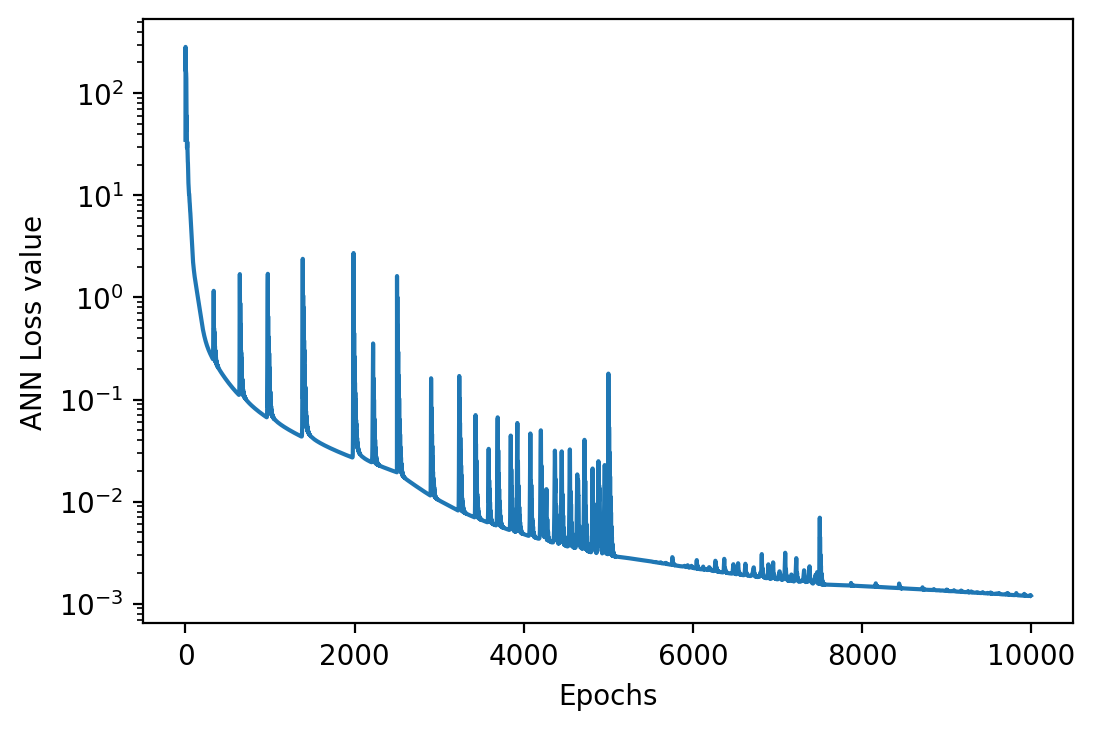

In [22]:
plt.figure(dpi=200)
plt.semilogy(loss_iters)
plt.xlabel("Epochs")
plt.ylabel('ANN Loss value')

[]

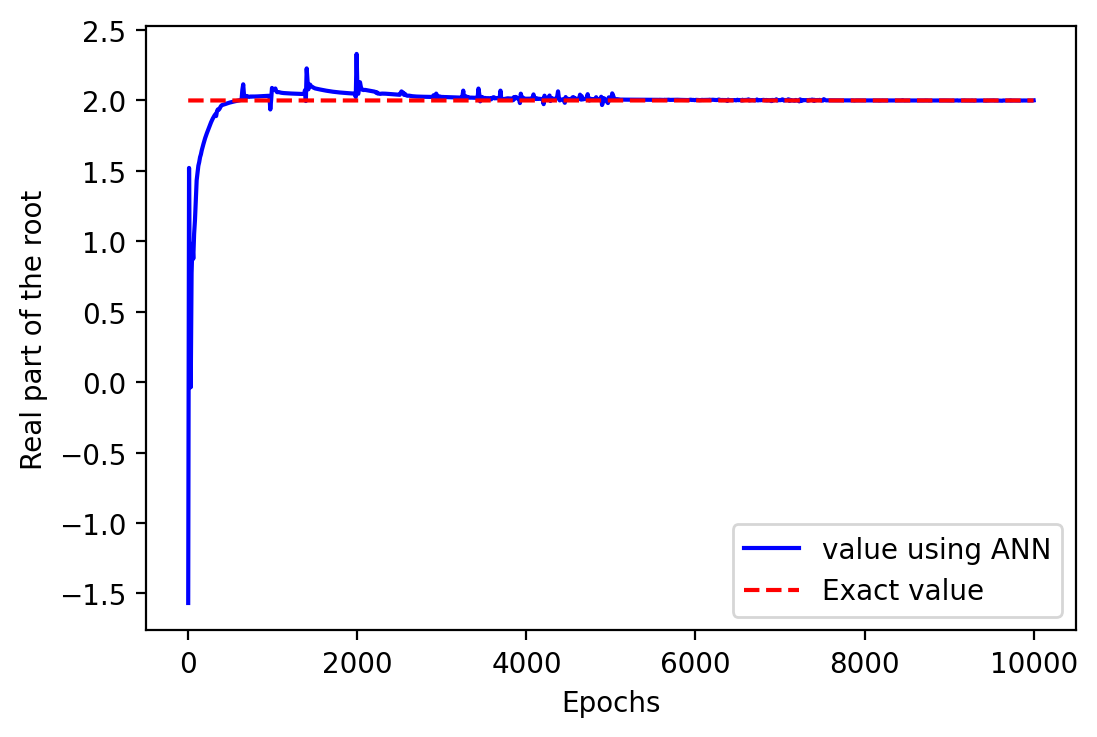

In [79]:
plt.figure(dpi=200)
plt.plot(np.linspace(0,10000,1000),real[::10],'b',label='value using ANN')
plt.plot(2*np.ones(10000),'r--',label='Exact value')
plt.xlabel("Epochs")
plt.ylabel('Real part of the root')
plt.legend()
plt.plot()

[]

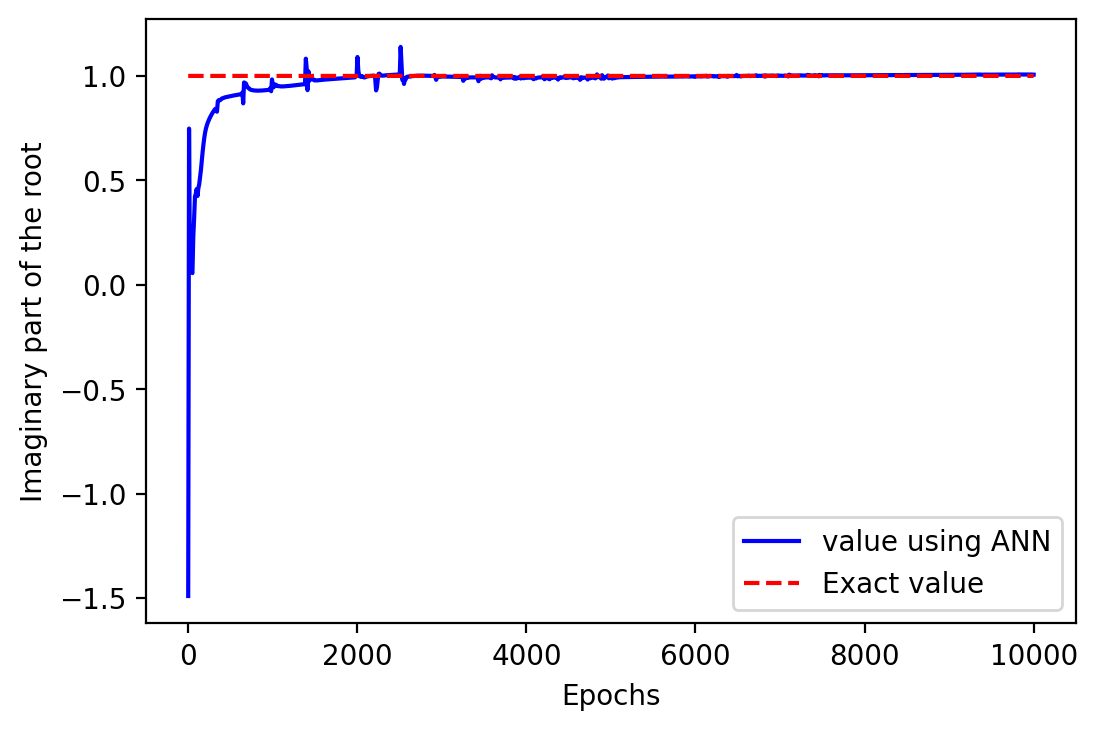

In [78]:
plt.figure(dpi=200)
plt.plot(np.linspace(0,10000,1000),imag[::10],'b',label='value using ANN')
plt.plot(1*np.ones(10000),'r--',label='Exact value')
plt.xlabel("Epochs")
plt.ylabel('Imaginary part of the root')
plt.legend()
plt.plot()